<h1>Sandra Field </h1>
MSDS 432, Dr Ali <br>
Spring 2021
<h3>Sort Algorithm Comparison: <br><br>
    Quicksort, Merge, Bubble, Insertion, Selection</h3><br>

In [39]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import time
import random, string
from time import perf_counter, perf_counter_ns
from random import shuffle, seed
#from random import seed
#from random import random

#Graphics
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set_style('white')
style.use('seaborn-poster')


<h2>Sort Algorithms</h2>

In [2]:
# Quicksort O(N**2) 
def quickSort(array):

    if len(array) < 2:
        # base case, arrays with 0 or 1 elements are already sorted.
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all elements greather than the pivot
        greater = [i for i in array[1:] if i >= pivot]
#        return quickSort(less) + [pivot] + quickSort(greater)

# Insertion Sort O(N**2)
def insertionSort(arr):
    for i in range(len(arr)):
        j = i
        while j > 0 and (arr[j] <arr[j-1]):
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j = j - 1
#    return arr



In [3]:
# Merge sort 
# O(n log (n)) in the best, average, and worst case.
#Reference: https://big-o.io/algorithms/comparison/merge-sort/

def merge_sort(array):
    if len(array) > 1:
        middle = len(array) // 2  # divide array length in half and use the "//" operator to *floor* the result

        left_array = array[:middle]  # fill in left array
        right_array = array[middle:]  # fill in right array

        merge_sort(left_array)  # Sorting the first half
        merge_sort(right_array)  # Sorting the second half

        left_index = 0
        right_index = 0
        current_index = 0

        # compare each index of the subarrays adding the lowest value to the current_index
        while left_index < len(left_array) and right_index < len(right_array):
            if left_array[left_index] < right_array[right_index]:
                array[current_index] = left_array[left_index]
                left_index += 1
            else:
                array[current_index] = right_array[right_index]
                right_index += 1
            current_index += 1

        # copy remaining elements of left_array[] if any
        while left_index < len(left_array):
            array[current_index] = left_array[left_index]
            left_index += 1
            current_index += 1

        # copy remaining elements of right_array[] if any
        while right_index < len(right_array):
            array[current_index] = right_array[right_index]
            right_index += 1
            current_index += 1

'''if __name__ == '__main__':
    array = [12, 11, 15, 10, 9, 1, 2, 3, 13, 14, 4, 5, 6, 7, 8]
    merge_sort(array)
    print(array)'''

"if __name__ == '__main__':\n    array = [12, 11, 15, 10, 9, 1, 2, 3, 13, 14, 4, 5, 6, 7, 8]\n    merge_sort(array)\n    print(array)"

In [4]:
# Bubble Sort
# Best is O(n), average and worst is O(n^2)
# Reference: https://big-o.io/algorithms/comparison/bubble-sort/

def bubble_sort(array):
    n = len(array)
    while (n > 0):
        lastModifiedIndex = 0
        currentIndex = 1
        while (currentIndex < n):
            # if the item at the previous index is greater than the item at the `currentIndex`, swap them
            if (array[currentIndex - 1] > array[currentIndex]):
                # swap
                temp = array[currentIndex - 1]
                array[currentIndex - 1] = array[currentIndex]
                array[currentIndex] = temp
                # save the index that was modified
                lastModifiedIndex = currentIndex
            currentIndex += 1
            # save the last modified index so we know not to iterate past it since all proceeding values are sorted
        n = lastModifiedIndex

'''if __name__ == '__main__':
    array = [12, 11, 15, 10, 9, 1, 2, 3, 13, 14, 4, 5, 6, 7, 8]
    bubble_sort(array)
    print(array)'''

"if __name__ == '__main__':\n    array = [12, 11, 15, 10, 9, 1, 2, 3, 13, 14, 4, 5, 6, 7, 8]\n    bubble_sort(array)\n    print(array)"

In [5]:
#Selection Sort 

# Return the smallest element's index in the array
def findSmallest(arr):
    smallest = arr[0] # Stores smallest value
    smallest_index = 0 # Stores smallest index
    
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

# SelectionSort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
#  return newArr

# print(selectionSort([5, 3, 6, 2, 10]))

<h2>Time Tracking Function</h2>

In [6]:
#A time tracking function

def elapsed(func):
    time_start = perf_counter_ns()
    func()
    time_stop = perf_counter_ns()
    return ((time_stop - time_start) / 1000000) #convert from ns to ms

<h2>Create and Sort Data</h2>

In [7]:
np.random.seed(48)
def random_string_generator(str_size, allowed_chars):
    return ''.join(random.choice(allowed_chars) for x in range(str_size))
 
chars = string.ascii_letters # + string.punctuation


In [26]:
results =[]
for i in range(1,6):
    #Create arrays per size requirements
    string_count = 200*(i) 
    
    arrx = []  #initialize new array 
    arrx = list(random_string_generator(string_count, chars)) #ensure no duplicates & sorts data
    shuffle(arrx) #unsort data so we can sort later
    
    arra = arrx.copy()
    algorithm ="Selection Sort"
    sort_time = elapsed(lambda: selectionSort(arra))
    results.append([algorithm, string_count, sort_time])
    
    arrb = arrx.copy()
    algorithm ="QuickSort"
    sort_time = elapsed(lambda: quickSort(arrb))
    results.append([algorithm, string_count, sort_time])
    
    arrc = arrx.copy()    
    algorithm ="Insertion Sort"
    sort_time = elapsed(lambda: insertionSort(arrc))
    results.append([algorithm, string_count, sort_time])
    
    arrd = arrx.copy()
    algorithm ="Merge Sort"
    sort_time = elapsed(lambda: merge_sort(arrd))
    results.append([algorithm, string_count, sort_time])
    
    arre = arrx.copy()
    algorithm ="Bubble Sort"
    sort_time = elapsed(lambda: bubble_sort(arre))
    results.append([algorithm, string_count, sort_time])
    


<h1>Results</h1>

In [27]:
results_df = pd.DataFrame(results, columns = ['Algorithm','String Count','Elapsed Time (ms)'])


In [28]:
results_df

,Algorithm,String Count,Elapsed Time (ms)
0,Selection Sort,200,0.9103
1,QuickSort,200,0.0227
2,Insertion Sort,200,2.4212
3,Merge Sort,200,0.5523
4,Bubble Sort,200,3.5213
5,Selection Sort,400,3.8357
6,QuickSort,400,0.0427
7,Insertion Sort,400,10.2751
8,Merge Sort,400,1.3200
9,Bubble Sort,400,13.6138


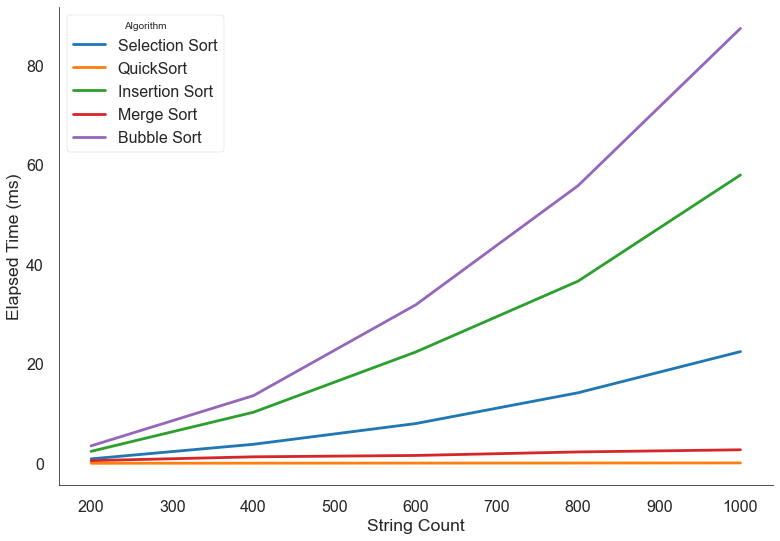

In [45]:
sns.lineplot(data=results_df, x='String Count', y='Elapsed Time (ms)',  hue="Algorithm")
sns.despine()


<h1>Summary</h1>


<b>Quicksort O(N^2)<br></b>
-Uses divide and conquer strategy to sort an array.<br>
-We chose a random element in the array as the pivot, so quicksort completed in O(n log n) time on average.<br>
-In the worst case, quicksort takes O(n2) time.<br>
-In the average case, quicksort takes O(n log n) time. <br>

<b>Merge sort = O(n log n)</b> <br>Like quicksort, merge also uses divide and conquer.<br><br>
<b>Insertion Sort = O(N^2)</b><br> Values from the unsorted part are picked and placed at the correct position in the sorted part.<br> <br>
<b>Bubble sort: Best is O(n), average and worst is O(n^2)</b><br>The simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in wrong order.<br>

<br><b>
If quicksort is O(n log n) on average, and merge sort is also O(n log n). Even though it was a close call, why did quicksort win?<br></b>

Big O notation of O(n) means constant(c) * n. C is the fixed amount of time that the algorithm takes.  So even though quicksort is O(n log n) on average, and merge sort is also O(n log n), quicksort has a smaller constant than merge sort. So if they’re both O(n log n) time, quicksort is faster in general, since the average case happens most often.

<h3>References for learning and code were</h3>
1. Grokking Algorithms <br>
2. <a href="https://big-o.io/algorithms/comparison">https://big-o.io/algorithms/comparison</a><br>
3. <a href="https://www.geeksforgeeks.org/sorting-algorithms/">https://www.geeksforgeeks.org/sorting-algorithms/</a>